In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as GridSpec
import numpy as np

In [7]:
path = "../Data/coffee/total-production.csv"
coffee_production_by_country = pd.read_csv(path).set_index("total_production")
coffee_production = coffee_production_by_country.T
coffee_production.index = coffee_production.index.astype("datetime64[ns]")

In [8]:
index_abr = {"Brazil": "BR",
             "Viet Nam": "VN", 
             "Colombia": "CO", 
             "Indonesia": "ID", 
             "Ethiopia": "ET", 
             "India": "IN", 
             "Mexico": "MX",
             "Guatemala": "GT",
             "Honduras": "HN",
             "Uganda": "UG"}

# Meshgrid - Single Figure Report on Brazil's Place in Global Coffee Market

* Create a Meshgrid Layout to combine our findings from our first project into a single report. 
* We want the two donut charts representing Brazil's production share in 1990 and 2018 in the top third of the figure. 
* The stackplot comparing Brazil to the rest of the world in the center of the figure. 
* In the bottom third a bar chart showing the total production of our top 5 countries, as well as a bar for other. Also include a pie chart showing the composition of the same data plotted in the bar chart. 
* Look up the country colors for our top 5 countries and color them accordingly. For 'other' category, color these grey.
* Consider setting rcParams to turn top and right borders off.
* Save the report out as an image.

In [77]:
axes_settings = {
    "spines.top": False,
    "spines.right": False,
    "titlesize": 12,
    "titleweight": "bold"
}

plt.rc("axes", **axes_settings)

font_settings = {
    "family": "serif",
    "serif": ["Times New Roman"]
}

plt.rc("font", **font_settings)

### Data Prep

In [14]:
brazil_vs_others = pd.DataFrame({"Brazil": coffee_production["Brazil"],
                                 "rest_of_world": coffee_production.sum(axis=1) - coffee_production["Brazil"]})
brazil_vs_others.head()

,Brazil,rest_of_world
1990-01-01,27285.6286,65944.431
1991-01-01,27293.4934,73973.191
1992-01-01,34603.3542,63922.545
1993-01-01,28166.9786,63597.643
1994-01-01,28192.0470,65121.147


In [11]:
coffee_production_top5_2018 = coffee_production.loc["2018-01-01", :].sort_values(ascending=False)[:5]
coffee_production_top5_2018["Rest of World"] = sum(coffee_production.loc["2018-01-01", :]) - sum(coffee_production_top5_2018)
coffee_production_top5_2018

total_production
Brazil           62924.8836
Viet Nam         31174.0742
Colombia         13857.9620
Indonesia         9417.5942
Ethiopia          7776.2234
Rest of World    45786.0003
Name: 2018-01-01 00:00:00, dtype: float64

In [94]:
coffee_production

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990-01-01,50.3450,122.7770,27285.6286,487.3930,1503.8150,7441.3830,982.4470,104.6280,962.8410,130.6270,...,214.9870,42.7830,95.8700,757.0170,161.3080,14.5810,1955.009,1122.4770,1310.2880,0.0000
1991-01-01,79.3310,103.5360,27293.4934,667.1990,2123.8240,8493.1960,932.5130,124.2860,746.8160,79.6530,...,192.5320,54.3790,81.5490,1468.9360,432.6520,17.7920,2088.001,940.7040,1437.8480,0.0000
1992-01-01,77.5200,120.2350,34603.3542,620.2380,1185.4800,5569.4780,1121.6840,137.1610,900.1110,54.2910,...,196.9780,39.0840,53.1810,1254.9450,85.6480,14.3280,2185.074,1215.2980,2340.4470,0.0000
1993-01-01,32.6080,50.8230,28166.9786,393.3540,2069.0070,6743.2880,441.8590,62.1110,1019.4810,70.0460,...,142.0660,37.4510,53.7900,1275.2010,194.9390,16.0790,3141.706,1332.8810,3020.2160,0.0000
1994-01-01,76.8020,116.9440,28192.0470,664.1430,2375.7660,5367.8780,641.3720,84.1120,1138.6590,24.6890,...,248.3130,72.7380,42.4480,1399.1350,176.2960,18.4350,2392.753,988.9960,3631.6090,0.0000
1995-01-01,62.1090,142.4850,18060.2022,433.9800,1888.2330,4573.4290,785.0090,91.2350,1002.3630,22.8430,...,209.4480,43.7680,35.5950,1317.2260,84.4010,17.6290,3243.584,1466.5540,3970.0860,0.0000
1996-01-01,70.9250,124.5790,29196.7430,400.9690,1992.9140,8220.5840,849.0080,48.6500,1089.3480,25.5630,...,210.7420,40.9100,36.9990,1403.5810,290.5860,18.1880,3418.724,1206.1620,5752.4810,0.0000
1997-01-01,64.3300,140.7190,26148.0040,249.7850,1190.6630,7620.7780,623.8040,60.8200,1074.0210,23.3790,...,217.4690,49.6790,57.5840,1293.0760,221.0780,19.3920,3439.868,951.2850,6978.9420,0.0000
1998-01-01,85.3440,137.9850,36760.8533,491.9920,1205.9680,7295.9550,991.7990,64.3210,1352.1490,58.3470,...,191.9960,26.8820,45.7380,915.9860,321.4860,17.0180,3385.839,1597.2790,7051.7220,68.7007
1999-01-01,54.9390,157.7020,47577.8065,350.5500,1197.6832,6557.0662,427.3170,59.0000,1387.0519,20.2410,...,166.3810,59.0200,31.7160,1272.8378,262.8080,16.8900,2862.447,1366.8350,11630.9138,60.5790


In [99]:
top5_producers = coffee_production.sum(axis=0).sort_values(ascending=False)[:5]
top5_producers["Rest of World"] = coffee_production.sum(axis=0).sort_values(ascending=False)[5:].sum()
top5_producers

total_production
Brazil           1.190966e+06
Viet Nam         4.395410e+05
Colombia         3.458714e+05
Indonesia        2.451168e+05
Ethiopia         1.415429e+05
Rest of World    1.225392e+06
dtype: float64

### Meshgrid Layout

In [21]:
brazil_1990 = brazil_vs_others.loc["1990-01-01", "Brazil"]
others_1990 = sum(brazil_vs_others.loc["1990-01-01"])
brazil_2018 = brazil_vs_others.loc["2018-01-01", "Brazil"]
others_2018 = sum(brazil_vs_others.loc["2018-01-01"])

In [90]:
colors = ["#009739",
          "#C8102E",
          "#003087",
          "#ff0000",
          "#FCDD09",
          "grey"]

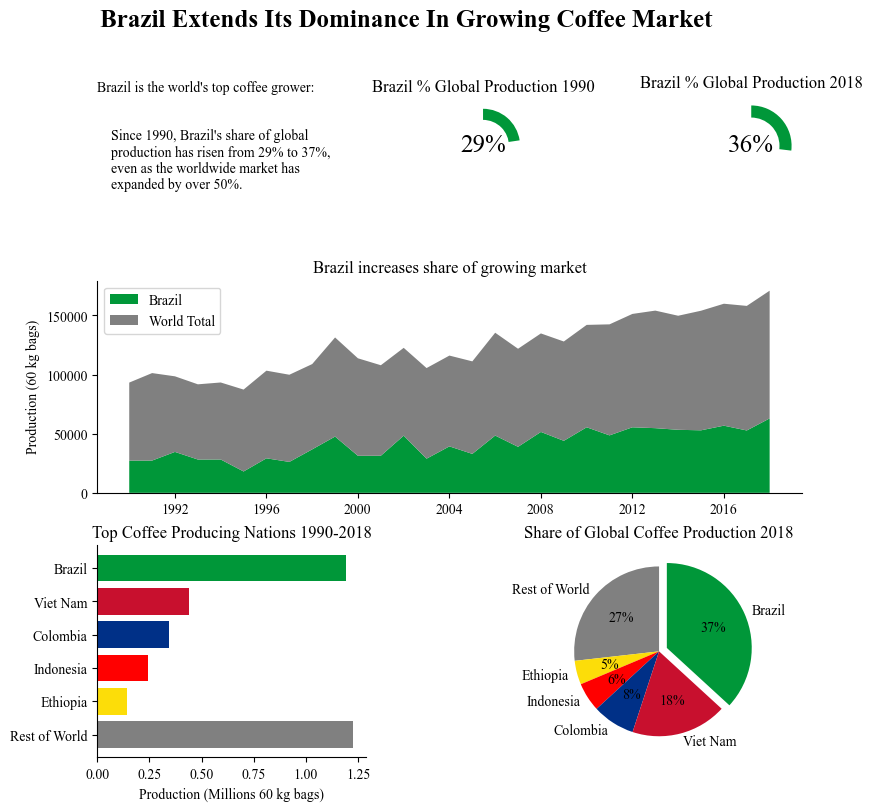

In [122]:
fig = plt.figure(constrained_layout = True, figsize=(8, 8))
fig.suptitle("Brazil Extends Its Dominance In Growing Coffee Market",
             fontsize=18,
             fontweight="bold")

grid = GridSpec.GridSpec(9, 9, figure=fig)

# Text
ax0 = fig.add_subplot(grid[:3, :3])
ax0.text(
    0,
    .3,
    s="""Brazil is the world's top coffee grower:
    
    
    Since 1990, Brazil's share of global
    production has risen from 29% to 37%,
    even as the worldwide market has
    expanded by over 50%."""
)
ax0.get_xaxis().set_visible(False)
ax0.get_yaxis().set_visible(False)
ax0.spines[["left", "bottom"]].set_visible(False)

# First pie chart
ax1 = fig.add_subplot(grid[:3, 4:6])

ax1.pie(
    [others_1990, brazil_1990],
    colors=["white", colors[0]],
    startangle=90
)
ax1.set_title("Brazil % Global Production 1990")

hole = plt.Circle((0, 0), .7, fc="white")
fig = plt.gcf()

# Adding Cirle in Pie chart
fig.gca().add_artist(hole)

plt.text(
    0,
    0,
    str(int(brazil_1990 / others_1990 * 100)) + "%",
    ha="center",
    va="center",
    fontsize=18
)

# Second Pie Chart
ax2 = fig.add_subplot(grid[:3, 7:])
ax2.set_title("Brazil % Global Production 2018")

ax2.pie(
    [others_2018, brazil_2018],
    colors=["white", colors[0]],
    startangle=90
)

hole = plt.Circle((0, 0), .7, fc="white")
fig = plt.gcf()

# Adding Cirle in Pie chart
fig.gca().add_artist(hole)

plt.text(
    0,
    0,
    str(int(brazil_2018 / others_2018 * 100)) + "%",
    ha="center",
    va="center",
    fontsize=18
)

# Stackplot
ax3 = fig.add_subplot(grid[3:6, :])

ax3.stackplot(
    brazil_vs_others.index,
    brazil_vs_others["Brazil"],
    brazil_vs_others["rest_of_world"],
    colors=[colors[0], colors[-1]]
)

ax3.set_title("Brazil increases share of growing market")
ax3.set_ylabel("Production (60 kg bags)")
ax3.legend(["Brazil", "World Total"])

# Bar Chart
ax4 = fig.add_subplot(grid[6:, :4])

ax4.set_title("Top Coffee Producing Nations 1990-2018")

ax4.barh(y = top5_producers.index[::-1],
       width = top5_producers[::-1] / 1e6,
       color=colors[::-1]
)

ax4.set_xlabel("Production (Millions 60 kg bags)")

# Pie Chart
ax5 = fig.add_subplot(grid[6:, 5:])
ax5.set_title("Share of Global Coffee Production 2018")

ax5.pie(
    coffee_production_top5_2018[::-1],
    labels=coffee_production_top5_2018.index[::-1],
    autopct="%.0f%%",
    startangle=90,
    explode=(0, 0, 0, 0, 0, .1),
    colors=colors[::-1]
)

plt.show()

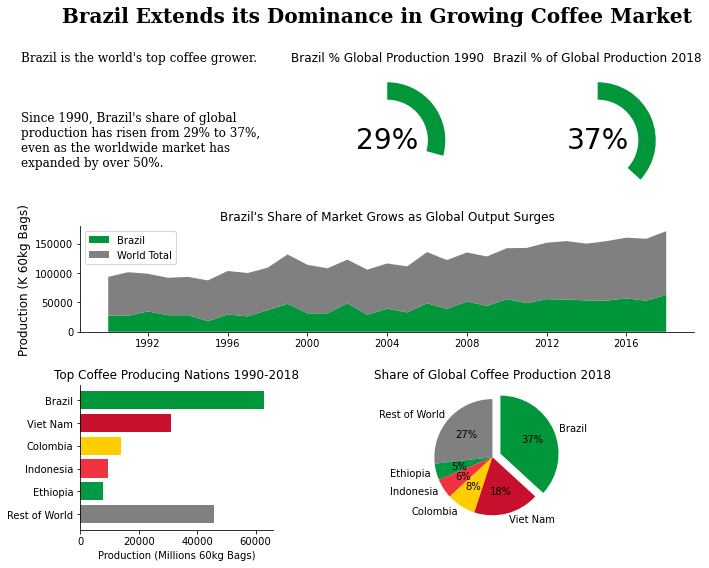

# Subplots

* Read in `prices-paid-to-growers.csv` and create a subplot grid of histograms showing the distribution of prices paid to the countries Brazil, Colombia, Ethiopia, and one for all other nations.

In [111]:
prices_paid_to_growers = pd.read_csv("../Data/coffee/prices-paid-to-growers.csv").T.drop(9, axis=1)

prices_paid_to_growers.columns= prices_paid_to_growers.iloc[0]

prices_paid_to_growers.drop("prices_paid_to_growers", inplace=True)

prices_paid_to_growers["Other Nations"] =  prices_paid_to_growers.drop(["Colombia", "Brazil", "Ethiopia"], axis=1).mean(axis=1)

In [112]:
prices_paid_to_growers.head()

prices_paid_to_growers,Colombia,Dominican Republic,El Salvador,Guatemala,Honduras,India,Uganda,Brazil,Ethiopia,India,Togo,Uganda,Other Nations
1990,1.534724,1.458168,1.116194,1.204956,1.11147,1.473558,0.337598,1.199223,1.348565,0.978921,0.645267,0.166486,0.943624
1991,1.48179,1.382845,0.983322,1.270086,1.238947,1.358371,0.654322,0.97115,1.505322,0.897289,0.632307,0.26143,0.964325
1992,1.204656,1.027841,0.682322,0.888099,0.886057,1.191159,0.441397,0.997768,1.351128,0.877945,0.658494,0.197653,0.761219
1993,1.106477,1.172704,0.780397,0.914552,0.828746,1.278669,0.552298,1.167263,1.362442,0.975912,0.499857,0.259737,0.806986
1994,1.898327,2.478234,2.191177,1.662711,1.800576,1.73081,1.666651,2.52911,2.418234,1.246437,0.573784,0.919709,1.585565


In [117]:
axes_settings = {
    "titlesize": 12,
    "titleweight": "normal"
}

plt.rc("axes", **axes_settings)

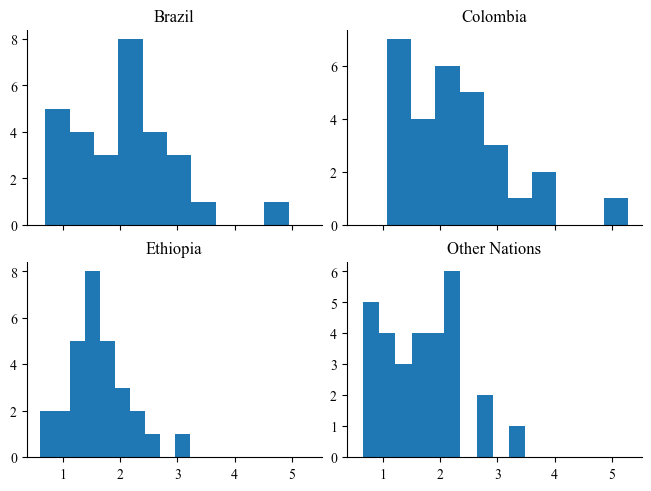

In [123]:
fig, ax = plt.subplots(2, 2, constrained_layout=True, sharex=True)

ax[0][0].hist(
    prices_paid_to_growers["Brazil"]
)
ax[0][0].set_title("Brazil")

ax[0][1].hist(
    prices_paid_to_growers["Colombia"]
)
ax[0][1].set_title("Colombia")

ax[1][0].hist(
    prices_paid_to_growers["Ethiopia"]
)
ax[1][0].set_title("Ethiopia")

ax[1][1].hist(
    prices_paid_to_growers["Other Nations"]
)
ax[1][1].set_title("Other Nations")

plt.show()